In [1]:
path = 'data/ken_songs.tsv'
open(path).readline()

'\tartist\tsong\tdate\n'

In [10]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [11]:
import json
records = [[item for item in line.split('\t')] for line in open(path)]
import pandas as pd
df = pd.DataFrame()
df = df.append(records[1:])
df.columns = ['index','artist', 'song', 'date']

In [3]:
df['artist'][:10]
artist_counts = df['artist'].value_counts()
artist_counts[:10]

FAIL                    223
Unknown                 159
Wire                    153
Neu                     138
Jonathan Kane           117
Matmos                  101
Curd Duca               100
Elakelaiset              85
Satanicpornocultshop     80
Go Home Productions      77
dtype: int64

In [4]:
results = pd.Series([artist for artist in df.artist])
results[:5]
results.value_counts()[:10]

FAIL                    223
Unknown                 159
Wire                    153
Neu                     138
Jonathan Kane           117
Matmos                  101
Curd Duca               100
Elakelaiset              85
Satanicpornocultshop     80
Go Home Productions      77
dtype: int64

In [5]:
import numpy as np
elakelaiset = np.where(df['artist'].str.contains('r'), 'r\'ed', 'Not r\'ed')
by_elakelaiset = df.groupby(['date', elakelaiset])
agg_counts = by_elakelaiset.size().unstack().fillna(0)
indexer = agg_counts.sum(1).argsort()
indexer[:10]

date
1/1/2003\n     501
1/1/2014\n     283
1/10/2007\n    144
1/11/2006\n    110
1/11/2012\n    280
1/12/2005\n    329
1/12/2011\n    174
1/13/2010\n    325
1/14/2004\n    152
1/14/2009\n    456
dtype: int64

In [6]:
count_subset = agg_counts.take(indexer)[20:30]
count_subset

,Not r'ed,r'ed
date,,
4/25/2001\n,7,16
1/23/2002\n,6,18
3/3/2010\n,11,13
2/22/2012\n,15,9
7/28/2010\n,16,8
3/28/2001\n,13,11
2/5/2005\n,14,10
3/9/2011\n,14,10
3/7/2007\n,14,11


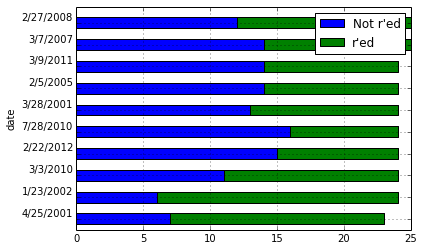

In [12]:
count_subset.plot(kind='barh', stacked=True)

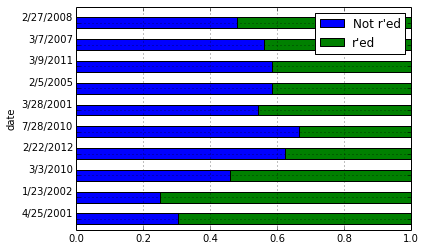

In [13]:
normed_subset = count_subset.div(count_subset.sum(1), axis=(0))
normed_subset.plot(kind='barh',stacked=True)

In [15]:
bohemian = df[df['song'].str.contains('Bohemian')==True]
bohemian

,index,artist,song,date
8212,13,Moritz,Bohemian Rhapsody,6/22/2005\n
11733,20,Kim Doo Soo,Bohemian,5/9/2007\n
14509,21,Queen,Bohemian Multitrack Rhapsody,10/7/2009\n
16527,8,Moritz,Bohemian Rhapsody,6/16/2010\n
17090,14,Moritz,Bohemian Rhapsody,1/13/2010\n
17091,15,Queen,Bohemian Multitrack Rhapsody,1/13/2010\n
17333,14,bd594,Bohemian Rhapsody,11/9/2011\n
17459,9,bd594,Bohemian Rhapsody,10/12/2011\n
17492,6,BD594,Bohemian Rhapsody,10/5/2011\n
18356,32,Moritz,Bohemian Rhapsody,3/30/2011\n


In [16]:
df['hasBohemian'] = df.song.str.contains('Bohemian')
df.head()

,index,artist,song,date,hasBohemian
0,0,Marlene Dietrich,Puff der Zauberdrachen,12/12/2001\n,False
1,1,Ruach,Puff The Kosher Dragon,12/12/2001\n,False
2,2,Gefilte Joe &amp; The Fish,Hanukah Rocks,12/12/2001\n,False
3,3,Kalesijski Svuci,Komsinice Mila Moja,12/12/2001\n,False
4,4,Tornado Lue,Marie,12/12/2001\n,False
